# Определение популярных критериев компьютерных игр

**Описание проекта**

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года (данные могут быть неполными). Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import scipy.stats as st

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv ('/datasets/games.csv')

### Информация о датафрейме

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В ходе изучения информации о датафрейме выявлена необходимость приведения названий столбцов к нижнему регистру, устранения пропусков и приведения данных к нужным типам.

## Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

В столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating` имеются пропущенные данные. 
В столбцах `year_of_release`, `critic_score` и `user_score` пропущенные значения обозначим как -1, в `rating` заменим на unknown, а строки с пропусками в столбцах `name` и `genre` удалим.

In [6]:
#заполнение пропусков на unknown в rating
df['rating'] = df['rating'].fillna('unknown')

In [7]:
#удаление строк с пропусками в name и genre
df.dropna(subset=['name', 'genre'], inplace=True)

In [8]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD (to be determined) означает, что оценка еще не проставлена и появится позже. Заменим эти значения на Nan.

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

В столбце `rating` пропущено много значений. Для того чтобы не потерять данные, пропускам присвоено значение unknown.

В столбцах `name` и `genre`пропуски только в двух строчках, поэтому строки с пропусками удалены.

В столбце `user_score` обнаружено значение TBD - его заменили на Nan.
В столбцах `year_of_release`, `critic_score` и `user_score` пропущенные значения обозначили как -1, чтобы не потерять важную информацию. 

Пропуски могли появиться из-за сбора данных из различных источников.

### Преобразование данных в нужные типы

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
df.critic_score.unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
df['critic_score'] = df['critic_score'].astype('int32')

In [14]:
df['user_score'] = pd.to_numeric(df['user_score'])

Выполнена замена типов данных в столбцах `year_of_release` и `critic_score` на целочисленный, в `user_score` на float.

### Cуммарные продажи во всех регионах

In [15]:
#df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

В результате подготовки данных:
- все названия столбцов приведены к нижнему регистру
- обработаны пропуски в столбцах `rating` (обозначены как unknown - чтобы не потерять данные), `name` и `genre` (пропуски удалены - всего 2 пропуска, которые не повлияют на расчеты), `year_of_release`, `critic_score` и `user_score`  (обозначены как -1 - чтобы не потерять данные)
- преобразованы типы данных в столбцах `year_of_release` и `critic_score` на целочисленный, в `user_score` на float
- расчитаны суммарные продажи во всех регионах.

## 3 Исследовательский анализ данных

### Исследование кол-ва игр

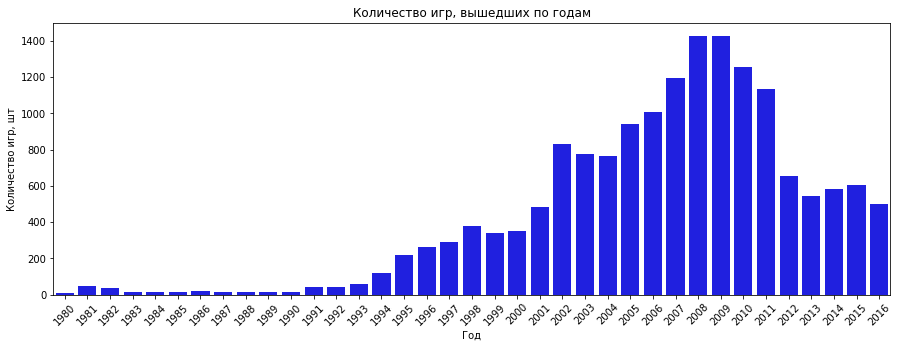

In [16]:
game_sales = df.query('year_of_release != -1').pivot_table(index='year_of_release', values='name', aggfunc='count')

plt.figure(figsize=(15, 5))

sns.barplot(data=game_sales, x=game_sales.index, y='name', color='blue')

plt.title('Количество игр, вышедших по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр, шт')

plt.xticks(rotation=45)
plt.show()

Игры стали выпускать в 1980 году. с 2001 года начался активный рост количества выпускаемых игр. Больше всего игр было выпущено в 2008 году. После пика количество игр стало снижаться и в 2012 осталось на уровне 600 шт. 

### Исследование продаж по платформам

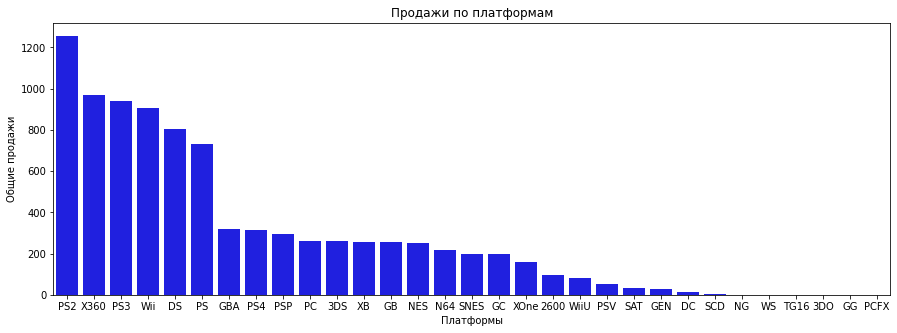

In [17]:
platform_sales = (df.pivot_table(index='platform', values='sales_total', aggfunc='sum').
sort_values('sales_total', ascending=False))

plt.figure(figsize=(15, 5))

sns.barplot(data=platform_sales, x=platform_sales.index, y='sales_total', color='blue')

plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

Наибольшие продажи у платформ: PS2, X360, PS3, Wii, DS и PS. Исследуем их подробнее.

#### Исследование продаж по платформам с наибольшими суммарными продажами за весь период

PS2


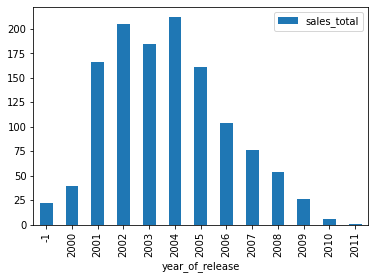

X360


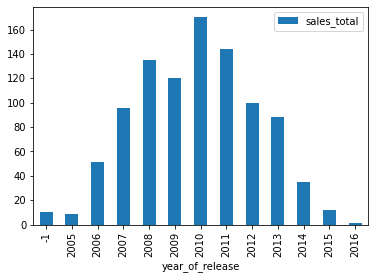

PS3


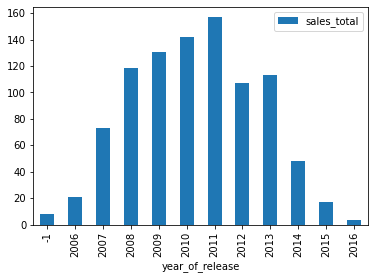

Wii


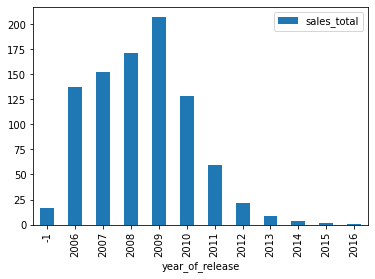

DS


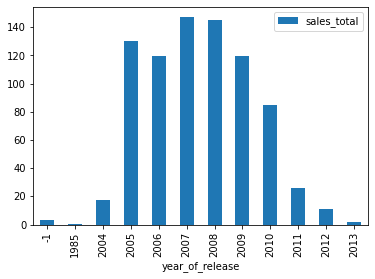

PS


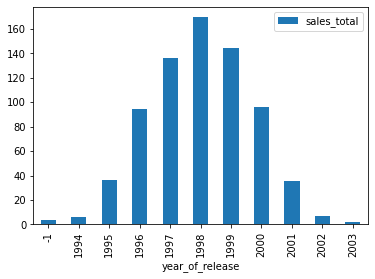

In [18]:
for platform in platform_sales.index[:6]:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Популярные платформы в среднем живут 10 лет, они достигают пика за 5 лет, а затем их продажи снижаются и достигают минимума.

### Выбор актуального периода

Сфера видеоигр быстро меняется, поэтому актуальный период для анализа - последние 2 года (с 2015).
Будем проводить дальнейшие исследования с учетом данного ограничения периода.

In [19]:
df_actual = df[df['year_of_release'] > 2014]

### Платформы - лидиры по продажам с 2015 года

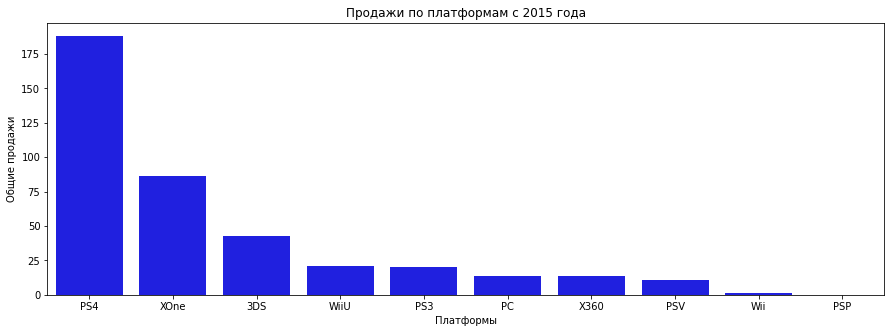

In [20]:
actual_platform_sales = (df_actual.pivot_table(index='platform', values='sales_total', aggfunc='sum').
sort_values('sales_total', ascending=False)
)
plt.figure(figsize=(15, 5))

sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'sales_total', color = 'blue')

plt.title('Продажи по платформам с 2015 года')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

После выбора актуального периода список популярных платформ изменился. Наибольшие продажи с 2015 года у платформ: PS4, Xone и 3DS.

#### Исследование продаж по платформам с наибольшими суммарными продажами c 2015 года

PS4


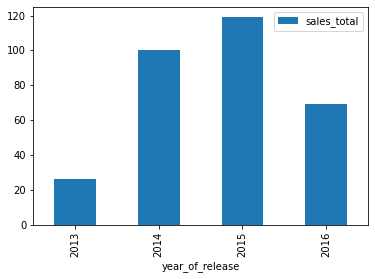

XOne


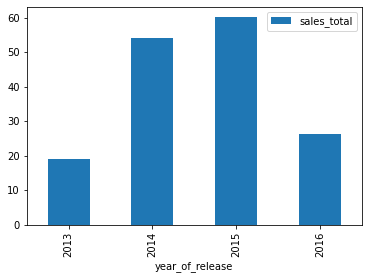

3DS


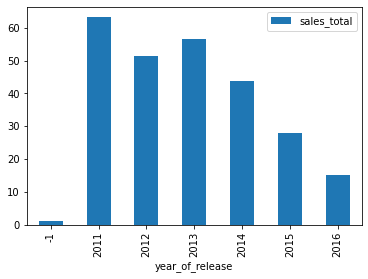

WiiU


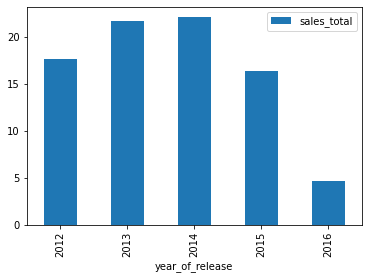

PS3


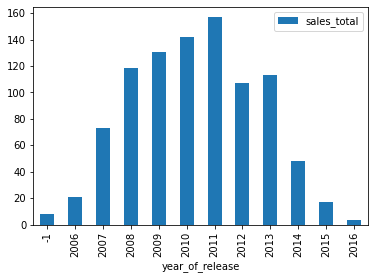

PC


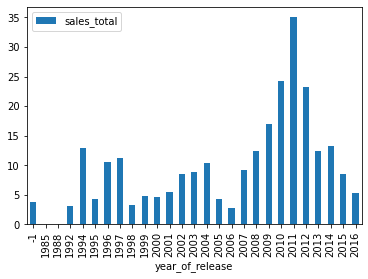

In [21]:
for platform in actual_platform_sales.index[:6]:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Все платформы показывают снижение продаж к 2016 году. Потенциально прибыльными из них могут быть PS4, XOne и WiiU.

### График «ящик с усами» по глобальным продажам игр в разбивке по перспективным платформам

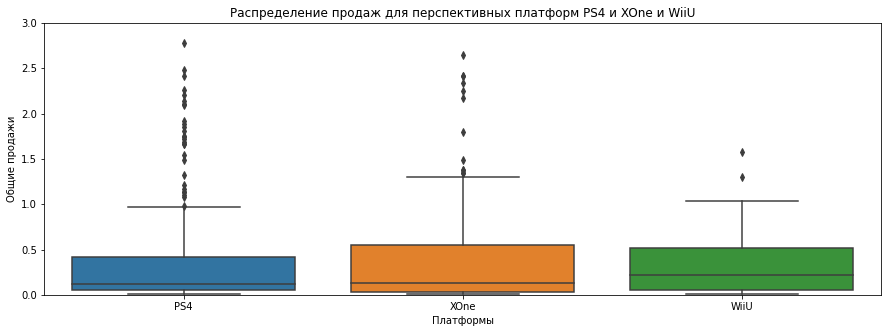

In [22]:
filtered_data = df_actual[df_actual['platform'].isin(['PS4', 'XOne', 'WiiU'])]

plt.figure(figsize=(15, 5))
sns.boxplot(data=filtered_data, x='platform', y='sales_total')

plt.title('Распределение продаж для перспективных платформ PS4 и XOne и WiiU')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 3)
plt.show()

Построила график "ящик с усами" для перспективных платформ - PS4 и XOne и WiiU. 
Медиана продаж у всех примерно одинакова (0,15), но  WiiU продается немного лучше. Большая часть значений продаж у всех плафторм выше медианы.


### Влияние на продажи внутри отзывов пользователей и критиков внутри перспективных платформ PS4 и XOne и WiiU

              critic_score  sales_total  user_score
critic_score      1.000000     0.180980    0.904883
sales_total       0.180980     1.000000    0.068805
user_score        0.904883     0.068805    1.000000


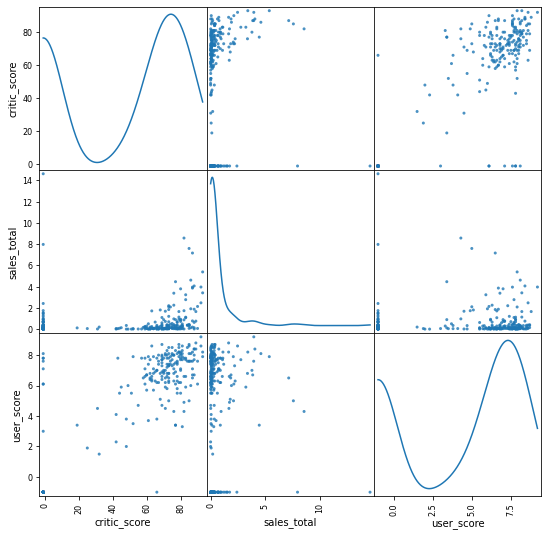

In [23]:
data_ps4 = df_actual[df_actual.platform == "PS4"]
data_ps4_matrix = pd.pivot_table(data_ps4, index='name', values=['sales_total', 'critic_score', 'user_score'])
pd.plotting.scatter_matrix(data_ps4_matrix, figsize=(9, 9), alpha=0.8, diagonal='kde')

correlation_matrix = data_ps4_matrix.corr()
print(correlation_matrix)
plt.show()

              critic_score  sales_total  user_score
critic_score      1.000000     0.226812    0.765440
sales_total       0.226812     1.000000    0.018937
user_score        0.765440     0.018937    1.000000


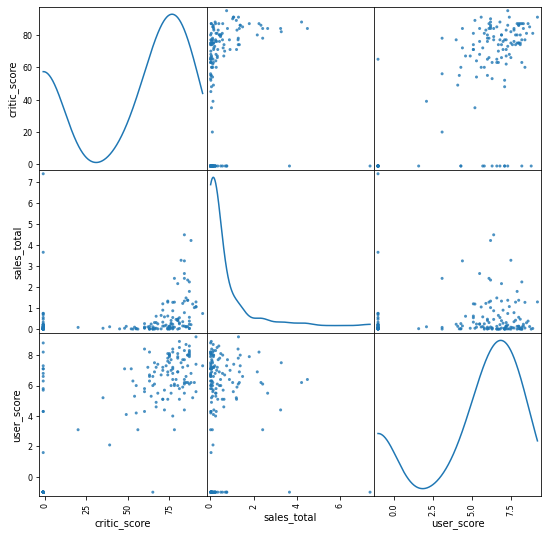

In [24]:
data_ps3 = df_actual[df_actual.platform == "XOne"]
data_ps3_matrix = pd.pivot_table(data_ps3, index='name', values=['sales_total', 'critic_score', 'user_score'])
pd.plotting.scatter_matrix(data_ps3_matrix, figsize=(9, 9), alpha=0.8, diagonal='kde')

correlation_matrix = data_ps3_matrix.corr()
print(correlation_matrix)
plt.show()

              critic_score  sales_total  user_score
critic_score      1.000000     0.366825    0.904242
sales_total       0.366825     1.000000    0.318253
user_score        0.904242     0.318253    1.000000


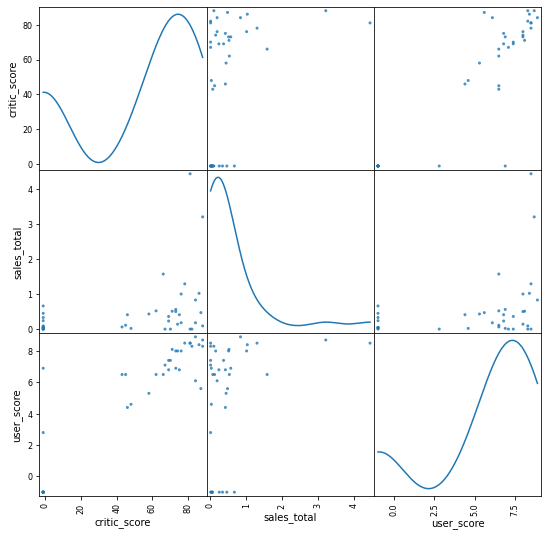

In [25]:
data_x360 = df_actual[df_actual.platform == "WiiU"]
data_x360_matrix = pd.pivot_table(data_x360, index='name', values=['sales_total', 'critic_score', 'user_score'])
pd.plotting.scatter_matrix(data_x360_matrix, figsize=(9, 9), alpha=0.8, diagonal='kde')

correlation_matrix = data_x360_matrix.corr()
print(correlation_matrix)
plt.show()

Значительной зависимости продаж от отзывов нет, но оценки критиков учитывают немного выше, чем от пользователей.

 ### Общее распределение игр по жанрам

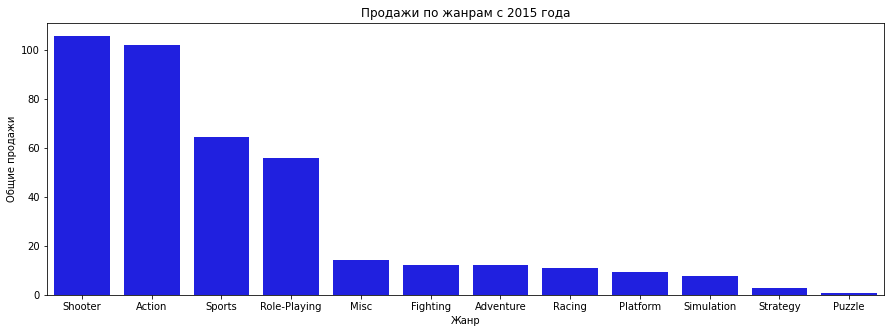

In [26]:
genre_sales = (df_actual.pivot_table(index='genre', values='sales_total', aggfunc='sum')
               .sort_values('sales_total', ascending=False))
plt.figure(figsize=(15, 5))

sns.barplot(data = genre_sales, x = genre_sales.index, y = 'sales_total', color = 'blue')

plt.title('Продажи по жанрам с 2015 года')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')
plt.show()

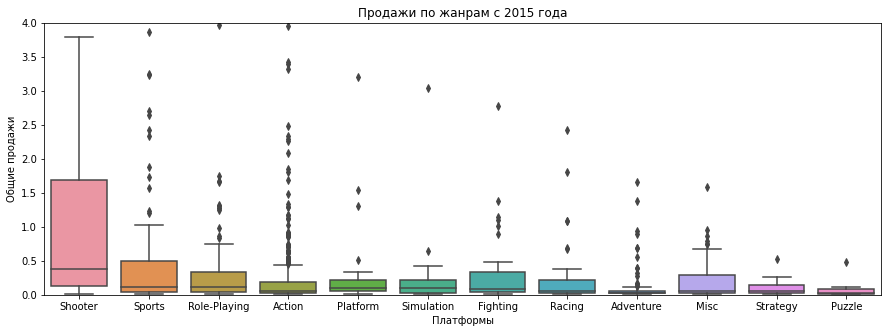

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_actual, x='genre', y='sales_total')

plt.title('Продажи по жанрам с 2015 года')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 4)
plt.show()

Больше всего продано игр в жанре Action, остальные жанры значительно отстают, но при этом сумма продаж наибольшая у игр в жанрах Shooter, Action и Sports.  
    
Если посмотреть на медианные продажи, то наибольшая медиана продаж у игр в жанре Shooter, т. е. этот жанр самый привлекательный для продаж.
 

В ходе исследовательского анализа сделаны следующие выводы:

- Игры стали выпускать в 1980 году, с 2001 года начался активный рост количества выпускаемых игр. Больше всего игр было выпущено в 2008 году. После пика количество игр стало снижаться и в 2012 осталось на уровне 600 шт. 
- Наибольшие продажи игр на платформах: PS2, X360, PS3, Wii, DS и PS за весь период.
- Популярные платформы в среднем живут 10 лет, они достигают пика за 5 лет, а затем их продажи снижаются и достигают минимума.
- Наибольшие продажи с 2015 года у платформ: PS4, Xone и 3DS. Все платформы показывают снижение продаж к 2016 году. Потенциально прибыльными из них могут быть PS4, XOne и WiiU.
- Значительной зависимости продаж от отзывов нет, но оценки критиков учитывают немного выше, чем от пользователей.
- Наибольшая медиана продаж у игр в жанре Shooter, т. е. этот жанр самый привлекательный для продаж.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [28]:
na_platform = df_actual.groupby('platform')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu_platform = df_actual.groupby('platform')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp_platform = df_actual.groupby('platform')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

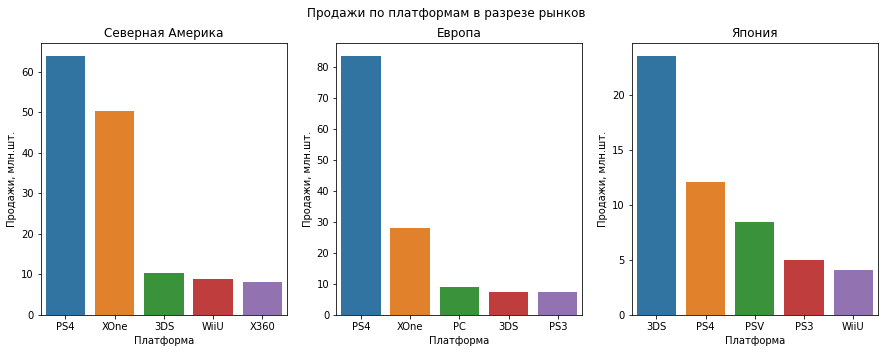

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по платформам в разрезе рынков')

sns.barplot(y='na', x='platform', data=na_platform, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи, млн.шт.')
ax[0].set_xlabel('Платформа')

sns.barplot(y='eu', x='platform', data=eu_platform, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи, млн.шт.')
ax[1].set_xlabel('Платформа')

sns.barplot(y='jp', x='platform', data=jp_platform, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи, млн.шт.')
ax[2].set_xlabel('Платформа')
plt.show()

В Северной Америке и Европе лидер PS4. В Японии значительно лидирует 3DS, на втором месте находится PS4. 

### Самые популярные жанры (топ-5)

In [30]:
# Группировка данных ТОП5 жанров по продажам в разрезе рынков
na_genres = df_actual.groupby('genre')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu_genres = df_actual.groupby('genre')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp_genres = df_actual.groupby('genre')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

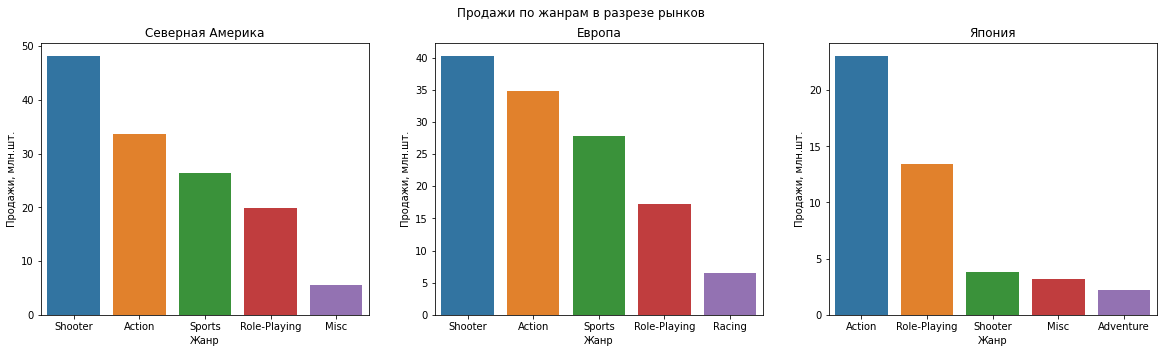

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Продажи по жанрам в разрезе рынков')

sns.barplot(y='na', x='genre', data=na_genres, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи, млн.шт.')
ax[0].set_xlabel('Жанр')

sns.barplot(y='eu', x='genre', data=eu_genres, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи, млн.шт.')
ax[1].set_xlabel('Жанр')

sns.barplot(y='jp', x='genre', data=jp_genres, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи, млн.шт.')
ax[2].set_xlabel('Жанр')
plt.show()

Самым популярным жанром в Северной Америке и Европе является Shooter, а в Японии - Action и Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [32]:
na_rating = df_actual.groupby('rating')['na_sales'].agg(na_sales='sum').reset_index()
eu_rating = df_actual.groupby('rating')['eu_sales'].agg(eu_sales='sum').reset_index()
jp_rating = df_actual.groupby('rating')['jp_sales'].agg(jp_sales='sum').reset_index()

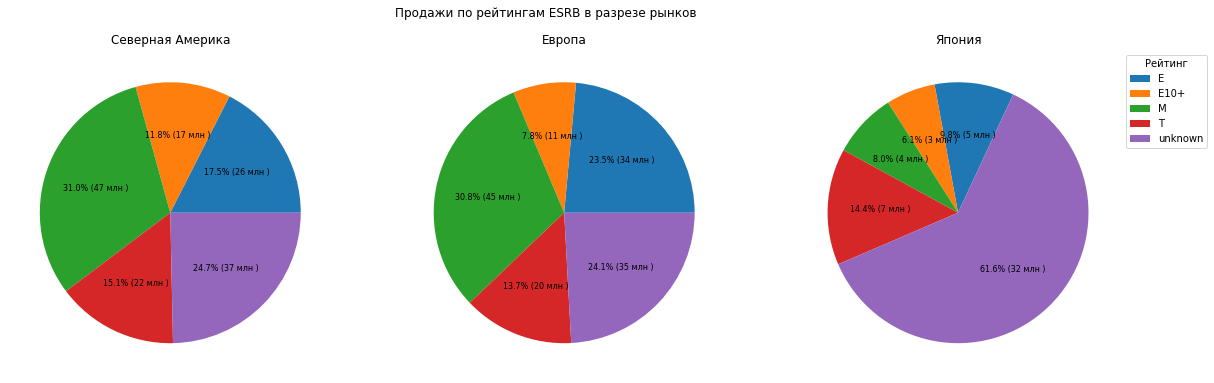

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Продажи по рейтингам ESRB в разрезе рынков')

data1, categories1 = na_rating['na_sales'], na_rating['rating']
data2, categories2 = eu_rating['eu_sales'], eu_rating['rating']
data3, categories3 = jp_rating['jp_sales'], jp_rating['rating']

def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}% ({:d} млн )".format(pct, absolute)

# Северная Америка
wedges, texts, autotexts = ax[0].pie(data1, autopct=lambda pct: func(pct, data1))
ax[0].set_title("Северная Америка")
plt.setp(autotexts, size=8)

# Европа
wedges, texts, autotexts = ax[1].pie(data2, autopct=lambda pct: func(pct, data2))
ax[1].set_title("Европа")
plt.setp(autotexts, size=8)

# Япония
wedges, texts, autotexts = ax[2].pie(data3, autopct=lambda pct: func(pct, data3), startangle=65)
ax[2].set_title("Япония")
ax[2].legend(wedges, categories3, title="Рейтинг", loc="upper left", bbox_to_anchor=(1, 1))
plt.setp(autotexts, size=8)

plt.show()

Расшифровка буквенных обозначений рейтинга:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» 
- «E10+»(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M»(«Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «Unknown» — «Неопределенно»

В Северной Америке и Европе у большинства проданых игр рейтинг - М (для взрослых). В Японии более чем у половины игр отсутствует рейтинг, далее идет значительная доля игр с рейтингом - Т (подросткам).

Исследование портрета пользователя каждого региона показало:

- Большинство пользователей в Северной Америке и Европе использует PS4 и Xone, они предпочитают жанр Shooter. Большинство игр с рейтингом M.
- Пользователи в Японии заметно отличаются от Северной Америки и Европы. Значительное большинство пользователей в Японии использует 3DS и PS4, они предпочитают жанр Action и Role-Playing. Большинство игр с рейтингом Т.

## Проверка гипотезы

**Гипотеза № 1:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Применим t-критерий Стьюдентат, потому что в обоих случаях выборки независимы между собой. Пороговое значение p-value = 0.05.

In [34]:
score = df_actual[df_actual['user_score'] > 0]

print('Средний пользовательский рейтинг XOne', round(score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг PC', round(score.query('platform == "PC"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('platform == "XOne"')['user_score'], 
    score.query('platform == "PC"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг XOne 6.54
Средний пользовательский рейтинг PC 6.3

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


**Гипотеза № 2:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- Нулевая: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Альтернативная: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Применим t-критерий Стьюдента. Пороговое значение p-value = 0.05.

In [35]:
print('Средний пользовательский рейтинг жанра Action', round(score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(score.query('genre == "Sports"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('genre == "Action"')['user_score'], 
    score.query('genre == "Sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action 6.81
Средний пользовательский рейтинг жанра Sports 5.2

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


В ходе проверки гипотез:

- Не отвергаем гипотезу №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Принимамем альтернативную гипотезу №2: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

## Вывод

В ходе исследования продаж компьютерных игр была выполнена следующая предобработка данных:
- все названия столбцов приведены к нижнему регистру
- обработаны пропуски в столбцах `rating` (обозначены как unknown - чтобы не потерять данные), `name` и `genre` (пропуски удалены - всего 2 пропуска, которые не повлияют на расчеты), `year_of_release`, `critic_score` и `user_score`  (обозначены как -1 - чтобы не потерять данные). Пропуски могли появиться из-за сбора данных из различных источников.
- преобразованы типы данных в столбцах `year_of_release` и `critic_score` на целочисленный, в `user_score` на float
- расчитаны суммарные продажи во всех регионах.

В ходе исследовательского анализа данных были изучены и описаны параметры объектов и сделаны следующие выводы:
- Игры выпускают с 1980 года, с 2001 года начался активный рост количества выпускаемых игр. Больше всего игр было выпущено в 2008 году. После пика количество игр стало снижаться и в 2012 осталось на уровне 600 шт. 
- Наибольшие продажи игр на платформах: PS2, X360, PS3, Wii, DS и PS за весь период.
- Популярные платформы в среднем живут 10 лет, они достигают пика за 5 лет, а затем их продажи снижаются и достигают минимума.
- Наибольшие продажи с 2015 года у платформ: PS4, Xone и 3DS. Все платформы показывают снижение продаж к 2016 году. Потенциально прибыльными из них могут быть PS4, XOne и WiiU.
- Значительной зависимости продаж от отзывов нет, но оценки критиков учитывают немного выше, чем от пользователей.
- Наибольшая медиана продаж у игр в жанре Shooter, т. е. этот жанр самый привлекательный для продаж.

Исследование портрета пользователя каждого региона (NA, EU, JP) показало:
- Большинство пользователей в Северной Америке и Европе использует PS4 и Xone, они предпочитают жанр Shooter. Большинство игр с рейтингом M.
- Пользователи в Японии заметно отличаются от Северной Америки и Европы. Значительное большинство пользователей в Японии использует 3DS и PS4, они предпочитают жанр Action и Role-Playing. Большинство игр с рейтингом Т.

В результате проверки гипотез:
- Не отвергаем гипотезу №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Принимамем альтернативную гипотезу №2: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.